# Geïntegreerde oefeningen

# 1. Oude examenvraag Calculus I

In [82]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

x,y,z,t = sp.symbols('x y z t')
u = sp.Function('u')
v = sp.Function('v')

## 1.1 Folium van Descartes

Het Folium van Descartes is een kromme in $\mathbb{R}^2$ die wordt gedefinieerd aan de hand van de parametervergelijkingen

$$ f(t) = \frac{3t}{t^3 + 1}, \quad g(t) = \frac{3t^2}{t^3+1}. $$

**Vraag 1**: Definieer de functies $f(t)$ en $g(t)$. Schrijf daaronder in een tekstvak wat het domein van de functies $f(t)$ en $g(t)$ zijn (het domein mag je op het zicht aflezen).

In [83]:
f = sp.Function('f')
g = sp.Function('g')

f = 3*t/(t**3+1)
g = 3*t**2/(t**3+1)

**Vraag 2**: Zoek de snijpunten van het Folium van Descartes met de eerste bissectrice. Laat Sympy de snijpunten teruggeven. Ga vervolgens na naar welke punten de kromme streeft voor $t \rightarrow \pm \infty$. 

In [85]:
snijpunten = sp.solveset(sp.Eq(f-g, 0), t)

sp.Limit(f, t, sp.oo, '+')
sp.Limit(g, t, sp.oo, '+')

snijpunten

{0, 1}

**Vraag 3:** Toon aan dat de limiet voor $t \rightarrow -1$ van $g(t)$ niet bestaat. Bereken daartoe linker-, rechter- en gewone limiet.


In [86]:
sp.limit(g, t, -1)
sp.limit(g, t, -1, '+')

oo

**Vraag 4:** Maak een plot van de kromme waarbij $t$ varieert tussen -100 en 100. Gebruik vier verschillende kleuren: laat de punten met $t < -1$ in het blauw tekenen, de punten met $-1 < t < 0$ in het rood, de punten met $0 < t < 1$ in het groen, en de punten met $t > 1$ in het zwart.

Zorg er tevens voor dat op ieder deel van de kromme 100 punten geplot worden als bolletjes bovenop de kromme. De punten hoeven niet op gelijke afstand van elkaar geplot te worden.

Zorg er ten slotte voor dat de $x$-as geplot wordt tussen -3 en 3 en de $y$-as tussen -4 en 4.

*Tip: Gebruik Numpy om de plot te maken en 'lambdify' om de functies om te zetten naar lijsten van functiewaarden.*

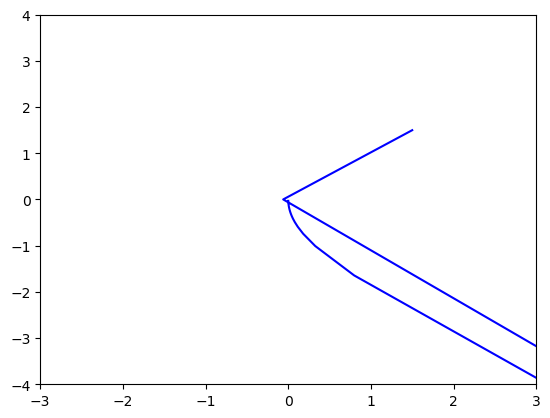

In [90]:
spa = 0.1
# t1 = np.arange(-100, 1, 100)
t1 = np.linspace(-100, 1, 100)


X1 = sp.lambdify(t, f, 'numpy')(t1)
Y1 = sp.lambdify(t, g, 'numpy')(t1)



fig, ax = plt.subplots(1, 1)

ax.plot(X1, Y1, color='b')

ax.set_xlim(-3, 3)
ax.set_ylim(-4, 4)

plt.show()

**Vraag 5:** Definieer de uitdrukking $s(t)$ die overeenkomt met de integrand die toelaat om de lengte van de kromme tussen twee willekeurige punten op de kromme te berekenen.



In [100]:
s = sp.Function('s')
y = sp.Function('y')
a, b = sp.symbols('a, b')

s = sp.Integral(sp.sqrt(1+y(x).diff(x)**2), (x, a, b))
s

Integral(sqrt(Derivative(y(x), x)**2 + 1), (x, a, b))

**Vraag 6:** Benader hiermee de lengte van het groene stuk van de kromme. Je mag stoppen met de methode te verfijnen, als er een redelijke zekerheid is dat de gemaakte fout kleiner is dan $10^{-3}$.

**Vraag 7:** Bereken de Taylorexpansie van graad 5 van de functies $f(t)$ en $g(t)$ rond $t=0$.

## 1.2 Lemniscaat van Bernoulli

Het lemniscaat van Bernoulli wordt gedefinieerd aan de hand van de poolvergelijking

$$ r^2 = \cos(2 \theta). $$

**Vraag 1:** Teken deze kromme in poolcoördinaten. Houd hierbij rekening met het domein voor $\theta$. Geef de grafiek een gepaste titel en zorg ervoor dat de kromme er verzorgd uit ziet.

**Vraag 2:** Bereken de oppervlakte die gelegen is binnen de kromme. Maak gebruik van symmetrieën waar je kunt.

# 2. Logistische differentiaalvergelijking

In deze oefening kun je Sympy gebruiken om zelf met hulp van wiskundesoftware een probleem te analyseren.

Om populaties van dieren te modelleren die weinig natuurlijke vijanden hebben, maar waarvan de groeisnelheid afhangt van de populatiedichtheid in het gebied (als de populatiedichtheid te groot wordt, dan is voedsel schaars en dit zet een rem op de groei van de populatie), is de logistische differentiaalvergelijking een goed model.

Stel dat $N(t)$ het aantal dieren (eventueel uitgedrukt in eenheden van honderden of duizenden) voorstelt op tijdstip $t$. De logistische differentiaalvergelijking wordt gegeven door $\frac{dN}{dt} = rN \left( 1 - \frac{N}{K} \right)$. De parameter $r > 0$ staat voor de groeifactor van de populatie wanneer de populatiedichtheid laag is, en $K > 0$ stelt de draagkracht van het gebied (hoeveel dieren in dit gebied kunnen overleven) voor. De logistische differentiaalvergelijking werd voor het eerst gebruikt door de Belgische wiskundige Pierre-François Verhulst in 1835 om dichtheidsafhankelijke populatiegroei te modelleren.


Los volgende vragen op door gebruik te maken van de symbolische en grafische mogelijkheden van Sympy:

- Voor sommige populatiegroottes is er een evenwichtstoestand, waarin het aantal dieren in de loop van de tijd niet meer verandert. Over welke populatiegroottes gaat het?
- Stel dat $N$ wordt uitgedrukt in eenheden van 1000 dieren en dat $r=1$ en $K=20$. Experimenteer zelf met enkele beginwaarden van $N(0)$. Modelleer de populatiegroei (dus vind $N(t)$ voor de gegeven beginpopulatie). Wat gebeurt er op lange termijn: evolueert de populatie naar een evenwichtssituatie of niet?